In [1]:
%load_ext autoreload
%autoreload 2

# Main setup
import imagej
ij = imagej.init(['io.github.mianalysis:mia-plugin:2.0.0-SNAPSHOT'])

from jpype import JClass
from scyjava import jimport
from src.utilities.imagerenderer import NotebookImageRenderer
from src.utilities.store import Store
from src.wrappers.coordinatesetwrapper import CoordinateSetFactoryWrapper
from src.wrappers.imagewrapper import ImageWrapper, ImageFactoryWrapper
from src.wrappers.measurementwrapper import MeasurementFactoryWrapper
from src.wrappers.metadatawrapper import MetadataWrapper
from src.wrappers.objwrapper import ObjFactoryWrapper
from src.wrappers.objswrapper import ObjsFactoryWrapper
from src.wrappers.volumewrapper import VolumeFactoryWrapper
from src.wrappers.workspacewrapper import WorkspaceWrapper

from src.modules.demomodule import ModuleDemo

import time

Store.ij = ij

# Setting renderer
ImageI = jimport('io.github.mianalysis.mia.object.image.ImageI')
ImageI.setGlobalRenderer(NotebookImageRenderer())
ImageI.setUseGlobalImageRenderer(True)

# Setting image factory
ImageFactories = jimport('io.github.mianalysis.mia.object.image.ImageFactories')
image_factory = ImageFactoryWrapper()
ImageFactories.addFactory(image_factory)
ImageFactories.setDefaultFactory(image_factory)

# Setting objects factory (both obj and objs factories must be enabled together)
ObjsFactories = jimport('io.github.mianalysis.mia.object.ObjsFactories')
objs_factory = ObjsFactoryWrapper()
ObjsFactories.addFactory(objs_factory)
ObjsFactories.setDefaultFactory(objs_factory)

# Setting object factory (both obj and objs factories must be enabled together)
ObjFactories = jimport('io.github.mianalysis.mia.object.coordinates.ObjFactories')
obj_factory = ObjFactoryWrapper()
ObjFactories.addFactory(obj_factory)
ObjFactories.setDefaultFactory(obj_factory)

# Setting volume factory
VolumeFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.VolumeFactories')
volume_factory = VolumeFactoryWrapper()
VolumeFactories.addFactory(volume_factory)
VolumeFactories.setDefaultFactory(volume_factory)

# Setting coordinateset factory
CoordinateSetFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.CoordinateSetFactories')
coordinate_set_factory = CoordinateSetFactoryWrapper()
CoordinateSetFactories.addFactory(coordinate_set_factory)
CoordinateSetFactories.setDefaultFactory(coordinate_set_factory)

# Setting measurement factory
MeasurementFactories = jimport('io.github.mianalysis.mia.object.measurements.MeasurementFactories')
measurement_factory = MeasurementFactoryWrapper()
MeasurementFactories.addFactory(measurement_factory)
MeasurementFactories.setDefaultFactory(measurement_factory)

# Module imports
FilterImage = jimport('io.github.mianalysis.mia.module.images.process.FilterImage')
IdentifyObjects = jimport('io.github.mianalysis.mia.module.objects.detect.IdentifyObjects')
ImageLoader = jimport('io.github.mianalysis.mia.module.inputoutput.ImageLoader')
ShowImage = jimport('io.github.mianalysis.mia.module.visualise.ShowImage')
MeasureObjectShape = jimport('io.github.mianalysis.mia.module.objects.measure.spatial.MeasureObjectShape')
ThresholdImage = jimport('io.github.mianalysis.mia.module.images.process.threshold.GlobalAutoThreshold')
AvailableModules = jimport('io.github.mianalysis.mia.module.AvailableModules')

# # Example of adding modules
# print(AvailableModules.getModuleNames(True).size())
# AvailableModules.addModuleName(ModuleDemo(None))
# print(AvailableModules.getModuleNames(False).size())

# # Example of loading a module through reflection
# cl = JClass(str(AvailableModules.getModuleNames(False).get(42)))
# cc = cl(None) # The module constructor
# print(cc.getShortDescription()) # Showing it's worked

[ERROR] Cannot create plugin: org.scijava.plugins.scripting.javascript.JavaScriptScriptLanguage


[INFO] Overriding MIA; identifier: command:io.github.mianalysis.mia.MIA_; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-plugin-2.0.0-SNAPSHOT.jar
[INFO] Overriding MIA (headless); identifier: command:io.github.mianalysis.mia.MIAHeadless; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-core-2.0.0-SNAPSHOT.jar


Operating in headless mode - the original ImageJ will have limited functionality.
Operating in headless mode - the WindowManager class will not be fully functional.


Image: Implement getDppXY
Image: Implement getDppZ
Image: Implement getSpatialUnits
Image: Implement getFrameInterval
Image: Implement getTemporalUnits
Image: Implement getDppXY
Image: Implement getDppZ
Image: Implement getSpatialUnits
Image: Implement getFrameInterval
Image: Implement getTemporalUnits
IMPORTANT: Find out dimension order for np_img in Image class, but for now assuming XYCZT
Objs: Add applySpatioTemporalCalibration to created image (convertToImage)


<java object 'io.github.mianalysis.mia.object.system.Status'>

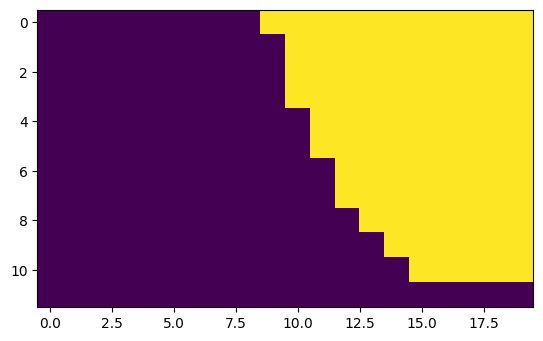

In [2]:
input_path = "/Users/sc13967/Documents/Programming/Python/mia-python/Ex3_Skeletonisation.tif"
series_number = 1
image_name = "demo"
objects_name = "DNA"

workspace = WorkspaceWrapper(1, input_path, series_number, None)

imageLoader = ImageLoader(None)
imageLoader.updateParameterValue(ImageLoader.OUTPUT_IMAGE, image_name)
# imageLoader.updateParameterValue(ImageLoader.SET_SPATIAL_CAL, True)
# imageLoader.updateParameterValue(ImageLoader.XY_CAL, 1)
# imageLoader.updateParameterValue(ImageLoader.Z_CAL, 1)
imageLoader.updateParameterValue(ImageLoader.CROP_MODE, ImageLoader.CropModes.FIXED)
imageLoader.updateParameterValue(ImageLoader.LEFT, 0)
imageLoader.updateParameterValue(ImageLoader.TOP, 0)
imageLoader.updateParameterValue(ImageLoader.WIDTH, 20)
imageLoader.updateParameterValue(ImageLoader.HEIGHT, 12)
imageLoader.setShowOutput(False)
imageLoader.process(workspace)

filterImage = FilterImage(None)
filterImage.updateParameterValue(FilterImage.INPUT_IMAGE, image_name)
filterImage.updateParameterValue(FilterImage.FILTER_MODE, FilterImage.FilterModes.GAUSSIAN2D)
filterImage.updateParameterValue(FilterImage.FILTER_RADIUS, 5)
filterImage.setShowOutput(False)
filterImage.process(workspace)

thresholdImage = ThresholdImage(None)
thresholdImage.updateParameterValue(ThresholdImage.INPUT_IMAGE, image_name)
thresholdImage.setShowOutput(False)
thresholdImage.process(workspace)

identifyObjects = IdentifyObjects(None)
identifyObjects.updateParameterValue(IdentifyObjects.INPUT_IMAGE, image_name)
identifyObjects.updateParameterValue(IdentifyObjects.OUTPUT_OBJECTS, objects_name)
identifyObjects.updateParameterValue(IdentifyObjects.SINGLE_OBJECT, True)
identifyObjects.updateParameterValue(IdentifyObjects.ENABLE_MULTITHREADING, False)
identifyObjects.setShowOutput(True)    
identifyObjects.process(workspace)

<xarray.DataArray 'Crop' (row: 11, col: 11)> Size: 968B
array([[255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])
Coordinates:
  * row      (row) float64 88B 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * col      (col) float64 88

[ERROR] java.lang.NullPointerException: Cannot invoke "ij.gui.Roi.getLength()" because the return value of "io.github.mianalysis.mia.object.coordinates.ObjI.getRoi(int)" is null
	at io.github.mianalysis.mia.module.objects.measure.spatial.MeasureObjectShape.lambda$process$0(MeasureObjectShape.java:355)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:572)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:317)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1583)



<java object 'io.github.mianalysis.mia.object.system.Status'>

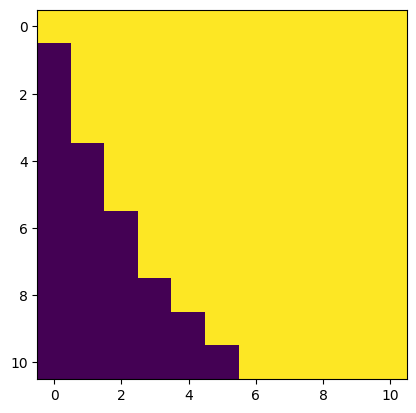

In [50]:
measureObjectShape = MeasureObjectShape(None)
measureObjectShape.updateParameterValue(MeasureObjectShape.INPUT_OBJECTS, objects_name)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_AREA, False)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_VOLUME, False)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_DIA, False)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_PERIM, True)
measureObjectShape.updateParameterValue(MeasureObjectShape.ENABLE_MULTITHREADING, False)
measureObjectShape.setShowOutput(True)
measureObjectShape.process(workspace)

In [2]:
from typing import List
from src.wrappers.coordinatesetwrapper import CoordinateSetWrapper
from src.wrappers.measurementwrapper import MeasurementWrapper
from src.wrappers.objswrapper import ObjsWrapper, wrapObjs
from src.wrappers.objwrapper import ObjWrapper

from src.objects.measurement import  Measurement
from src.objects.obj import  Obj

ow: ObjsWrapper = workspace.getObjects(objects_name)

TypeError: Class io.github.mianalysis.mia.object.coordinates.Point is not found

In [31]:
ipl = ij.IJ.createHyperStack("test",64,52,3,4,2,8)
im2:ImageWrapper = ImageWrapper("te",ipl)
d = im2.getRawImage()
print(d.coords["row"])

<xarray.DataArray 'test' (t: 2, pln: 4, row: 52, col: 64, ch: 3)> Size: 80kB
array([[[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
...
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]]]], shape=(2, 4, 52, 64, 3), dtype=uint8)
Coordinates:
  * t        (t) float64 16B 0.0 0.0
  * pln      (pln) float64 32B 0.0 1.0 2.0 3.0
  * row      (row) float64 416B 0.0 1.0 2.0 3.0 4.0 

In [ ]:
d.coords["row"].diff("row").mean().item()

Image: Implement getDppXY
Image: Implement getDppZ
Image: Implement getFrameInterval
<xarray.DataArray 'trial' (row: 5, col: 3)> Size: 120B
array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0., 255.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.]])
Coordinates:
  * row      (row) float64 40B 0.0 0.5 1.0 1.5 2.0
  * col      (col) float64 24B 0.0 0.5 1.0
Attributes:
    spatial_units:   
    temporal_units:  


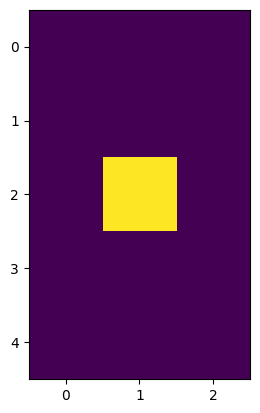

In [ ]:
from src.wrappers.imagewrapper import ImageWrapper
from src.objects.image import Image, createImage
from xarray import DataArray

im: DataArray = createImage("trial", 3, 5,dpp_xy=0.0345)
im.putPixel(val=255,x=1,y=2)
im.showAsIs()

In [ ]:
da: DataArray = workspace.getImage(image_name).getPythonImage().getRawImage()
da.coords.

Coordinates:
  * row      (row) float64 5kB 0.0 0.004883 0.009766 0.01465 ... 3.11 3.115 3.12
  * col      (col) float64 5kB 0.0 0.004883 0.009766 0.01465 ... 3.11 3.115 3.12